In [1]:
from __future__ import print_function, division
from builtins import range, input

In [2]:
import util 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import tensorflow as tf
import tensorflow_probability as tfp

In [ ]:
x = tf.Variable([[1, 2, 3], [4, 1, 0]])
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 1],
       [3, 0]])>

In [8]:
class BayesClassifierTF :
    def fit(self, X, Y) :
        """
        Fits the model to the data.

        Args:
            X: A 2D tensor of shape (n_samples, n_features).
            Y: A 1D tensor of shape (n_samples,).
        """
        unique, _ = tf.unique(Y)
        self.K = unique.shape.as_list()[0] #no of classes from 0 to K-1
        
        self.gaussians = []
        for k in range(self.K) :
            Xk = X[Y == k]
            mean = tf.reduce_mean(Xk, axis = 0)
            cov = tf.math.reduce_variance(Xk, axis = 0)
            self.gaussians.append(tfp.distributions.MultivariateNormalDiag(loc = mean, scale_diag=cov))
            
    def sample_given_Y(self, y) :
        """
        Generates a sample from the Gaussian distribution for the given class.

        Args:
            y: The class label.

        Returns:
            A 1D tensor of shape (n_features,).
        """
        g = self.gaussians[y]
        return g.sample()
    
    def sample(self) :
        """
        Generates a sample from a random class.

        Returns:
            A 1D tensor of shape (n_features,).
        """
        y = tf.random.uniform([], 0, self.num_classes, dtype=tf.int32)
        return self.sample_given_Y(y)

In [56]:
class BayesClassifier :
    def fit(self, X, Y) :
        
        #classes are numbered 0...K-1
        self.K = len(set(Y))
        
        self.gaussians = []
        for k in range(self.K) :
            Xk = X[Y == k]
            mean = Xk.mean(axis = 0)  #shape = 784
            cov = np.cov(Xk.T)  #shape = 784, 784
            g = {'m' : mean, 'c' : cov}
            self.gaussians.append(g)
            
    def sample_given_Y(self, y) :
        g = self.gaussians[y]
        return mvn.rvs(mean = g['m'], cov = g['c'])
    
    def sample(self) :
        y = np.random.randint(self.K)
        return self.sample_given_Y(y)

In [46]:
X, Y = util.get_mnist()  #shape of X = (42000, 784), Y = (42000,)

Reading in and transforming data...


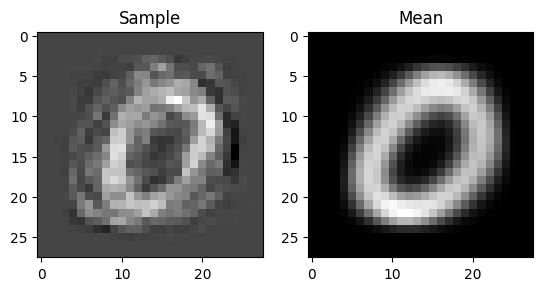

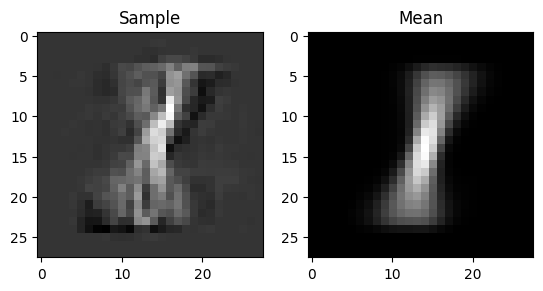

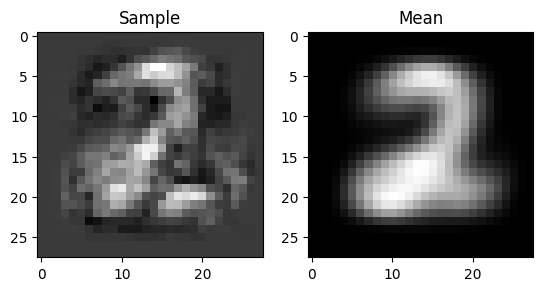

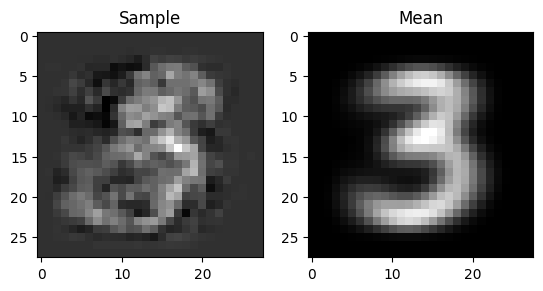

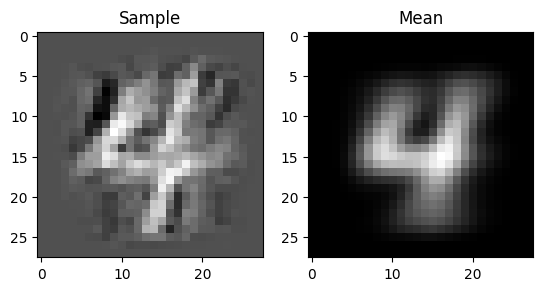

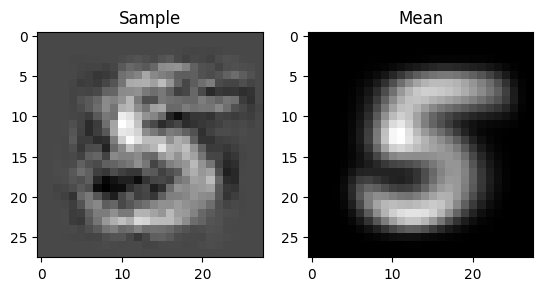

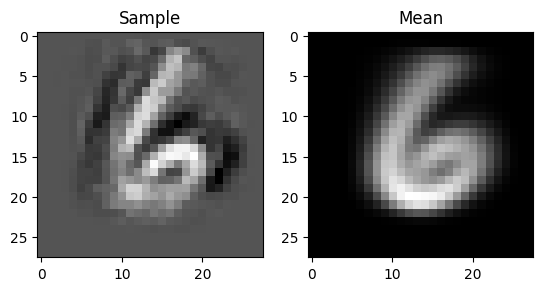

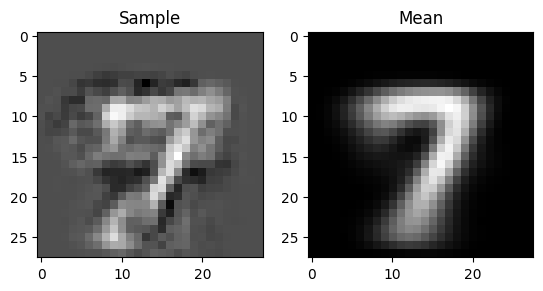

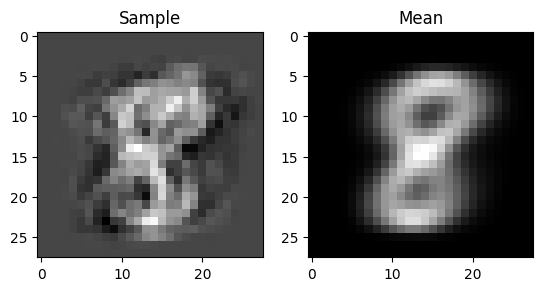

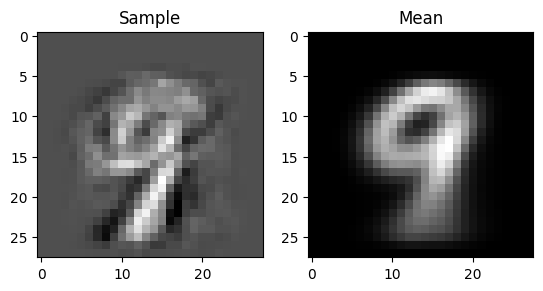

In [58]:
clf = BayesClassifier()
clf.fit(X, Y)

for k in range(clf.K) :
    #show one sample for each class
    #also show the mean image learned
    sample = clf.sample_given_Y(k).reshape(28, 28) #reshape back to 28 X 28
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap = 'gray')
    plt.title('Sample')
    plt.subplot(1, 2, 2)
    plt.imshow(mean, cmap = 'gray')
    plt.title('Mean')
    plt.show()


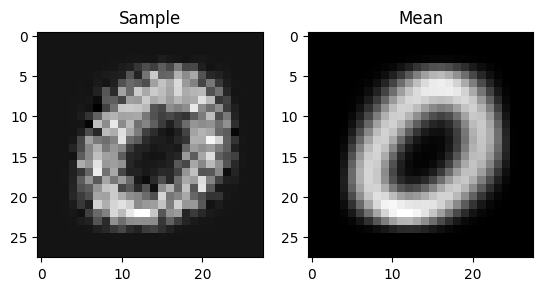

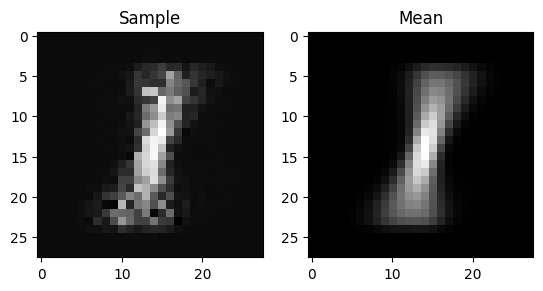

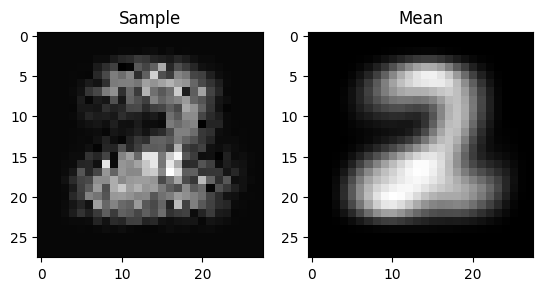

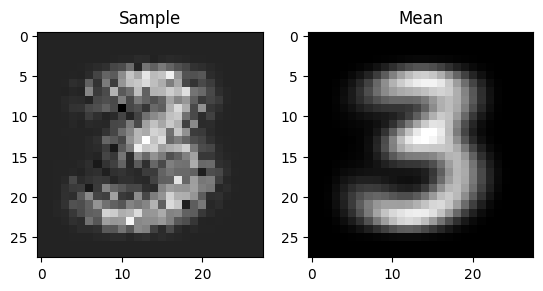

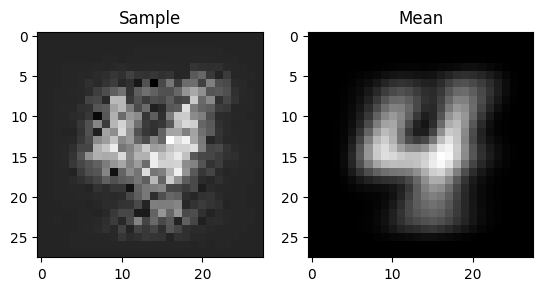

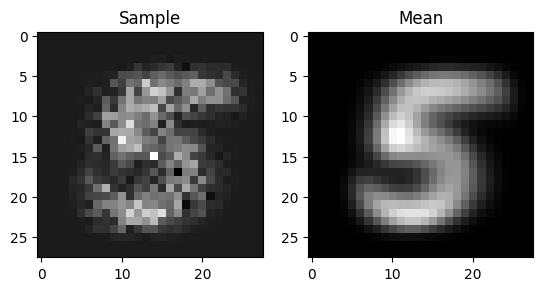

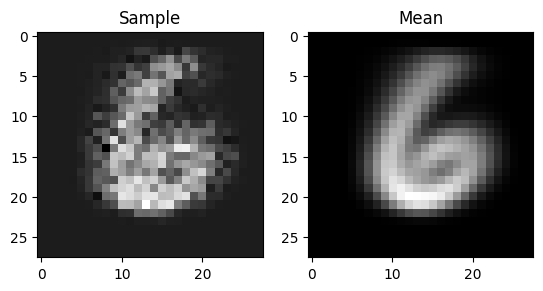

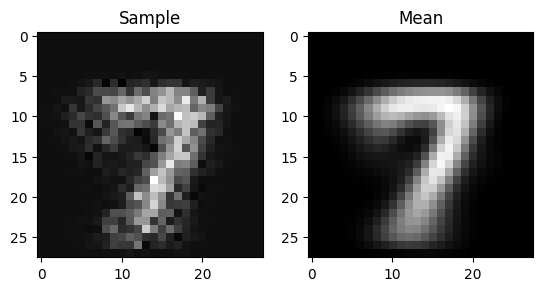

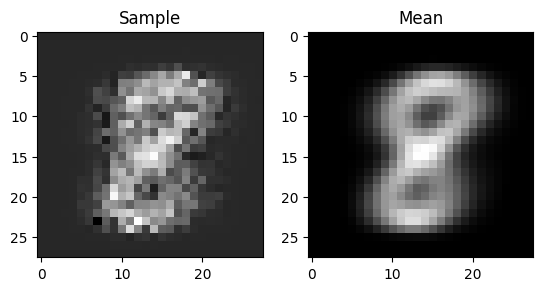

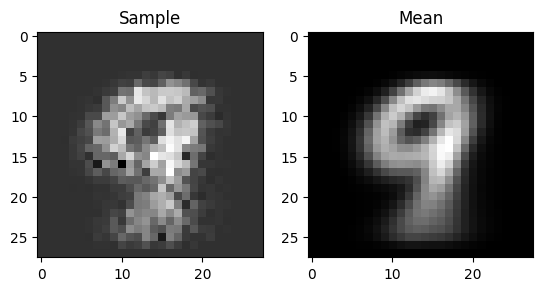

In [9]:
Xt, Yt = tf.convert_to_tensor(X, dtype = tf.float32), tf.convert_to_tensor(Y, dtype = tf.int32)
clf2 = BayesClassifierTF()
clf2.fit(Xt, Yt)

for k in range(clf2.K) :
    #show one sample for each class
    #also show the mean image learned
    #sample = clf.sample_given_Y(k).reshape(28, 28) #reshape back to 28 X 28
    #mean = clf.gaussians[k]['m'].reshape(28, 28)

    sample = clf2.sample_given_Y(k).numpy().reshape(28, 28) #reshape back to 28 X 28
    mean = clf2.gaussians[k].loc.numpy().reshape(28, 28)

    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap = 'gray')
    plt.title('Sample')
    plt.subplot(1, 2, 2)
    plt.imshow(mean, cmap = 'gray')
    plt.title('Mean')
    plt.show()


**Tensorflow implementation results in more noisy samples**

The samples generated from ```BayesClassifierTF``` are more noisy as compared to the other one because the TensorFlow implementation uses a different method for calculating the covariance matrix. The TensorFlow implementation uses the ```tf.math.reduce_variance``` function, which calculates the variance of each feature independently. This can lead to more noisy samples, especially if the features are not all perfectly correlated.

The other implementation uses the ```np.cov``` function, which calculates the covariance matrix by taking into account the correlations between all of the features. This can lead to smoother samples, as the noise is averaged out across all of the features.


Here is a more detailed explanation of the difference between the two implementations:

The TensorFlow implementation of the covariance matrix is as follows:

`
tf.math.reduce_variance(Xk, axis = 0)
`

This function calculates the variance of each feature in Xk independently. The variance of a feature is calculated as follows:

`
variance = (mean - mean)^2
`

where ```mean``` is the mean of the feature.

The other implementation of the covariance matrix is as follows:

`
np.cov(Xk.T)
`

This function calculates the covariance matrix by taking into account the correlations between all of the features in Xk. The covariance matrix is a square matrix that measures the strength of the linear relationship between pairs of variables. It is calculated as follows:

`
cov[i, j] = (mean[i] - mean[j])^2
`

where ```i``` and ```j``` are the indices of the features.

Text(0.5, 1.0, 'Random sample from random class')

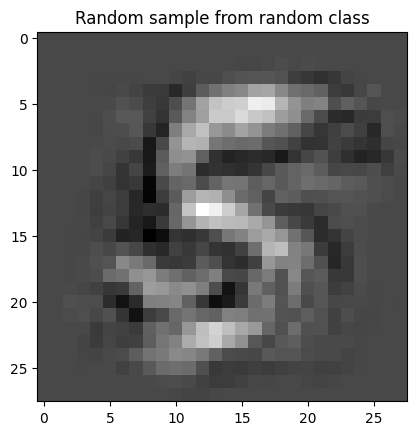

In [51]:
sample = clf.sample().reshape(28, 28)
plt.imshow(sample, cmap = 'gray')
plt.title('Random sample from random class')